In [5]:
%matplotlib inline
import bhtsne
import input_data
import numpy as np
import pandas as pd
import pylab as py
import timeit
import os

In [2]:
partition = 50
rand_seed = 12345
perplexity = 30
no_dims = 2

In [3]:
train_name, pred_name = input_data.get_file_name('20160830')
with open(train_name, 'r') as content_file:
    train = content_file.read().split('\n')
trX = [s[0:s.rfind(',')].replace(',', '\t') for s in train]
trY = [s[s.rfind(',')+1:] for s in train]
del trX[0]
del trY[0]
del trX[-1]
del trY[-1]
trY = [int(s) for s in trY]

In [6]:
start_it = timeit.default_timer()
reducedX = bhtsne.run_bh_tsne(trX[::partition], randseed=rand_seed, perplexity=perplexity, no_dims=no_dims)
end_it = timeit.default_timer()
print("Running time : %s" % (end_it - start_it))

Running time : 189.372657711996


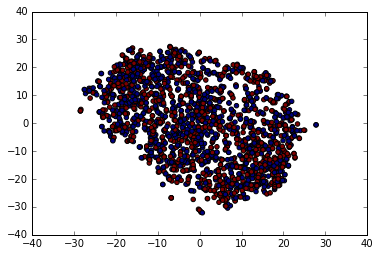

In [9]:
py.scatter(reducedX[:,0], reducedX[:,1], c=trY[::partition])